Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from doomrnn import reset_graph, ConvVAE

/home/beeperman/.conda/envs/wme/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [487]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
#model_path_name = "tf_models"
model_path_name = "tf_beta_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [326]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [327]:
obs.shape

(787, 64, 64, 3)

In [441]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [533]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=True,
              reuse=tf.AUTO_REUSE,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae1.json'))

INFO:tensorflow:Model using cpu.


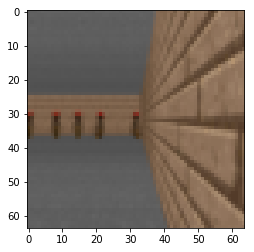

In [569]:
# show recorded frame that will be fed into the input of VAE
frame = random.choice(obs).reshape(1, 64, 64, 3)
plt.imshow(frame[0])
plt.show()

In [539]:

batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)
z = np.copy(batch_z)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])
tt

[ 0.3887 -1.5154 -1.1673 -0.7915  0.5099  1.0784  0.1246 -1.0911  0.2388  0.2395  0.1979  1.7696
  0.1155 -1.4364 -1.4995 -0.739  -0.0554 -0.5649 -0.1167  0.6774  0.005   0.9321  0.7683 -0.5773
 -0.6175 -0.0173  1.5688  0.7798 -0.4374  1.4033 -1.8987 -1.8445  0.5382  1.7675 -0.0747  0.3183
  0.139   0.348  -0.1998 -1.18    1.2039 -0.851   1.4454  1.11   -1.8622  0.6413  0.9675  0.377
  0.8828 -0.1556 -0.3065 -0.2127 -1.5695  0.3357 -0.0536 -0.5941 -1.4401  1.2122  0.7036  0.0063
  0.3855  0.3215 -0.754   0.1779]


array([[ 2.    ,  0.0125, -1.1673],
       [ 7.    ,  0.0199, -1.0911],
       [14.    ,  0.0107, -1.4995],
       [17.    ,  0.0228, -0.5649],
       [19.    ,  0.0074,  0.6774],
       [26.    ,  0.0109,  1.5688],
       [28.    ,  0.0182, -0.4374],
       [42.    ,  0.0158,  1.4454],
       [43.    ,  0.0068,  1.11  ],
       [47.    ,  0.0095,  0.377 ],
       [48.    ,  0.0157,  0.8828],
       [49.    ,  0.0422, -0.1556],
       [51.    ,  0.0292, -0.2127],
       [53.    ,  0.0058,  0.3357],
       [61.    ,  0.0052,  0.3215]])

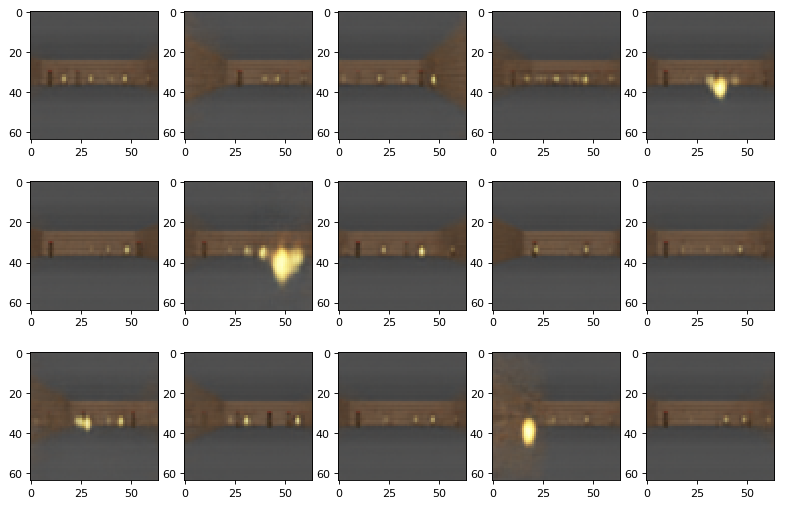

In [581]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'vae.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

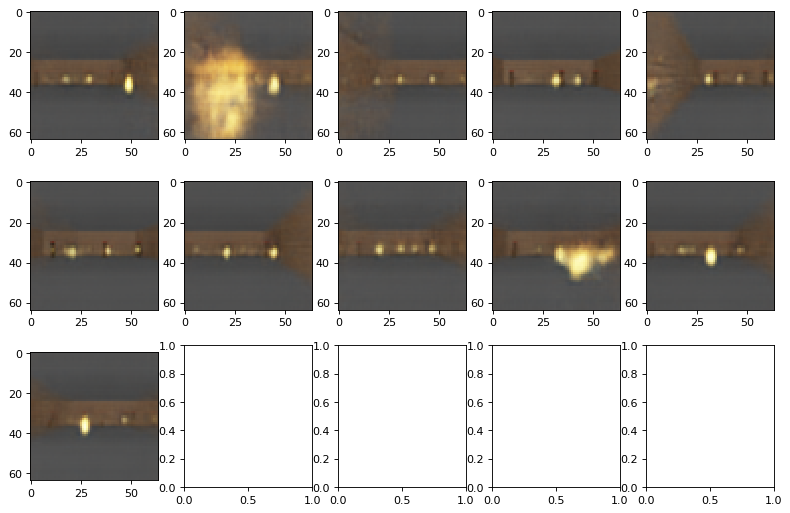

In [582]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b40.0_4.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

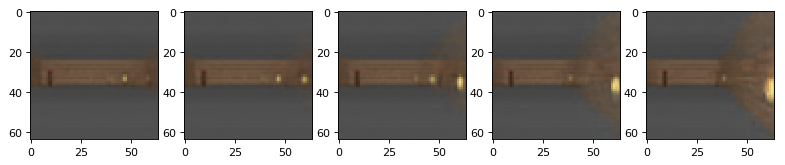

In [627]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'vae.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]


fig, ax = plt.subplots(1,5, figsize=(12,3), dpi=80)
for i in range(5):
    z = np.zeros_like(batch_z)
    z[0][index[5]] = -0 + 0.5 * i
    ax[i].imshow(vae.decode(z)[0])

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
plt.show()

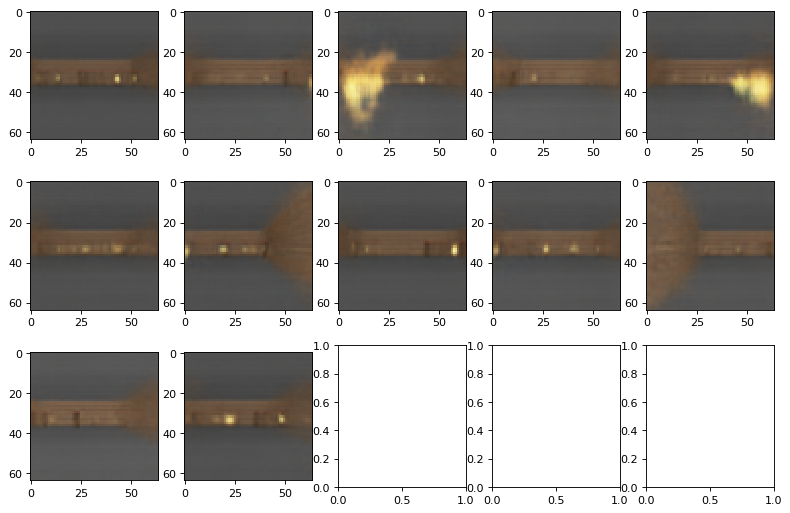

In [629]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b40.0_2.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

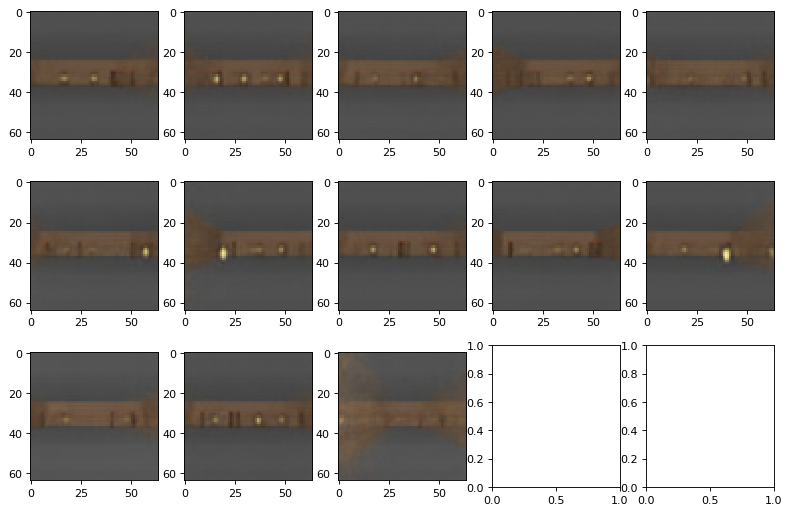

In [584]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b20.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())

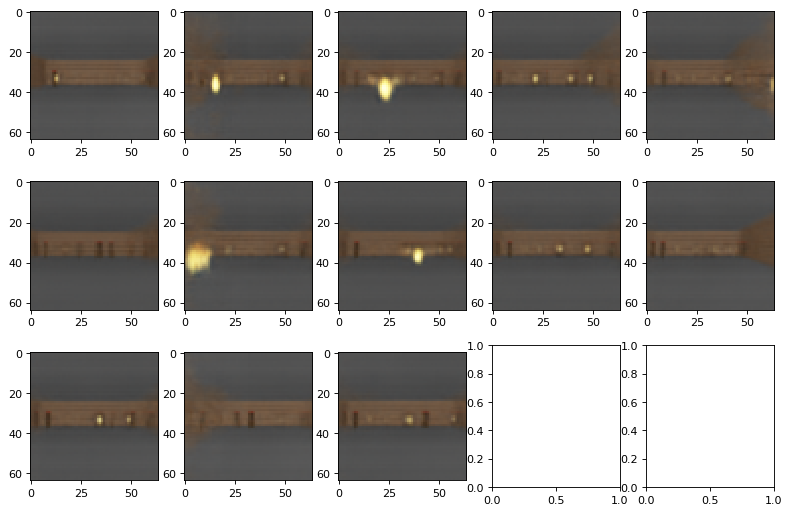

In [585]:
# show reconstruction #0bqckground 4blast- 8fireballontheleft 14fireballdist+ 17pos- 18background 23background 43background
# 55back+blast- 62back 63back
#z[0][17] = -0.27
#i = 1
vae.load_json(os.path.join(model_path_name, 'b10.0_1.json'))
batch_z = vae.encode(frame)
bb = [vae.encode(frame) for i in range(50)]
vv = np.var(bb, axis=0)[0]
tt = np.array([(i, vv[i], batch_z[0][i]) for i in range(len(vv)) if vv[i]<0.5])

index = np.array(tt[:,0],dtype=int)
init_value = tt[:,2]

fig, ax = plt.subplots(3,5, figsize=(12,8), dpi=80)
def update(i):
    label = 'timestep {0}'.format(i)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    for j in range(min([len(index), 15])):
        #z = np.copy(batch_z)
        z = np.zeros_like(batch_z)
        #z[0][index[j]] = init_value[j] + (i - 0) * 0.1
        z[0][index[j]] = i * 0.1
        ax[j//5, j%5].imshow(vae.decode(z)[0])
    return fig, ax

#reconstruct = vae.decode(z)
#plt.imshow(reconstruct[0])
anim = FuncAnimation(fig, update, frames=np.arange(-15, 16), interval=100)
#plt.show()
HTML(anim.to_html5_video())